In [35]:
using Distributed
using Plots
using JLD
using LaTeXStrings


include("../src/FCSeqTools.jl")
include("../src/functions.jl")

natural_sequences = do_number_matrix_prot(do_letter_matrix("../data/CM_130530_MC.fasta"), 0.2);
ref_seq = natural_sequences[1,:];

In [36]:
method = "cumulative"
fraction = 0.3
stop = 0.9
pseudo_count = 0.5
init_pseudo_count = 0.01
notebook = "1"

folder_path = "../training/" * method * string(fraction) * "_stop=" * string(stop) * "_reg="*string(pseudo_count)*"_h_ps-count=" * string(init_pseudo_count) * "nbook="*notebook

h = JLD.load(folder_path*"/h.jld")["data"]
J = JLD.load(folder_path*"/Jij.jld")["data"];
gen_seq = JLD.load(folder_path*"/generated_sequences.jld")["data"];
contact_list = JLD.load(folder_path*"/contact_list.jld")["data"];
site_degree = JLD.load(folder_path*"/site_degree.jld")["data"];

####### SECOND DATASET ################

method2 = "cumulative"
fraction2 = 0.3
stop2 = 0.9

folder_path2 = "../training/" * method2 * string(fraction2) * "_stop=" * string(stop2) #* "_reg="*string(pseudo_count)*"_h_ps-count=" * string(init_pseudo_count) * "nbook="*notebook

h2 = JLD.load(folder_path2*"/h.jld")["data"]
J2 = JLD.load(folder_path2*"/Jij.jld")["data"];
gen_seq2 = JLD.load(folder_path2*"/generated_sequences.jld")["data"];
contact_list2 = JLD.load(folder_path2*"/contact_list.jld")["data"];
site_degree2 = JLD.load(folder_path2*"/site_degree.jld")["data"];

####### THIRD DATASET ################

method3 = "cumulative"
fraction3 = 0.3
stop3 = 0.9
pseudo_count3 = 0.5



folder_path3 = "../training/" * method * string(fraction) * "_stop=" * string(stop) * "_reg="*string(pseudo_count) #*"_h_ps-count=" * string(init_pseudo_count) * "nbook="*notebook

h3 = JLD.load(folder_path3*"/h.jld")["data"]
J3 = JLD.load(folder_path3*"/Jij.jld")["data"];
gen_seq3 = JLD.load(folder_path3*"/generated_sequences.jld")["data"];
contact_list3 = JLD.load(folder_path3*"/contact_list.jld")["data"];
site_degree3 = JLD.load(folder_path3*"/site_degree.jld")["data"];

In [37]:
q = 21
n_seq = 1_000
ΔE = energy_space_connectivity(q, gen_seq[1:n_seq,:], h, J, contact_list, site_degree)
ΔE2 = energy_space_connectivity(q, gen_seq2[1:n_seq,:], h2, J2, contact_list2, site_degree2);
ΔE_ave = mean(ΔE)
ΔE2_ave = mean(ΔE2)
#ΔE3 = energy_space_connectivity(q, gen_seq3[1:n_seq,:], h3, J3, contact_list3);

5.05544290157165

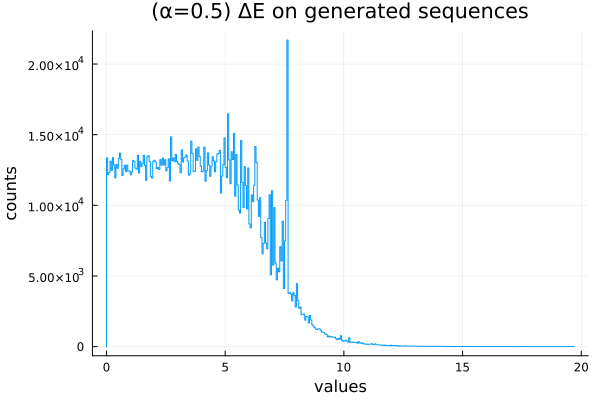

In [38]:
histogram(abs.(ΔE)[abs.(ΔE).<=20], bins= 500, title= "(α=0.5) ΔE on generated sequences", xlabel="values", ylabel="counts", label =:false)


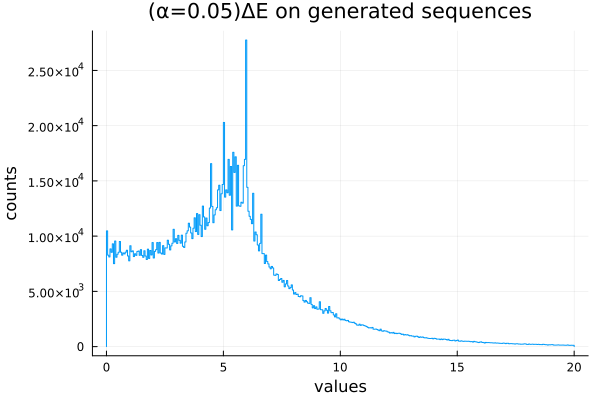

In [39]:
histogram(abs.(ΔE2)[abs.(ΔE2).<=20], bins= 500, title= "(α=0.05) ΔE on generated sequences", xlabel="values", ylabel="counts", label =:false)

In [40]:
ΔE_ave


3.6348710702479985

In [41]:
ΔE2_ave 

5.05544290157165